# kNN

One of the most straight-forward algorithms, it's also what makes it so powerful. It's a supervised learning algorithm that can be used for both classification and regression. It's a lazy algorithm, meaning it doesn't learn a discriminative function from the training data but memorizes the training dataset instead. It's also a non-parametric algorithm, meaning it doesn't make any assumptions on the underlying data distribution.  

Here is what you have to remember: it doesn't need training; it just needs to store the training data.  

How it works:
- Given a new data point, it finds the k closest data points in the training set
- It then assigns the label by majority vote (for classification) or by taking the average (for regression)  

The k in kNN is a hyperparameter that we have to choose. It's usually an odd number to avoid ties.  
That's pretty much it!

### More detail

When we say *"closest k points"*, we need to decide that using a *distance function*. We have various options:
- Euclidean distance
- Manhattan distance
- Minkowski distance
- Hamming distance
- Cosine similarity

Even I don't know how all of them work, but Euclidean distance is the most commonly-chosen one. It's the most intuitive, since we've been using it since middle-school. The traditional formula is: $$d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$  
Where n is the number of dimensions. We usually work with 2, but in ML we can have more (each dimension is a feature, after all).  

After deciding on the distance, we decide how many neighbors to use. This is the k in kNN. We can use a fixed number, or we can use a variable number. The variable number is usually the square root of the number of training samples. Best option should be decided by cross-validation (test multiple options and see which one performs best).  

And after deciding on the k parameter, we need to decide how these k points vote for the final label. We can use:
- Majority vote (classification)
- Average (regression)
- Weighted average (regression)
- Weighted majority vote (classification)
- some other method? use-cases vary, maybe you can think of something

For this notebook, we'll just use the majority vote. This means the the majority of the k points will decide the label of the new data point.

## Pros and cons
Pros:
- Simple to understand
- Simple to implement
- Versatile
- No assumptions about data
- Works with any number of classes
- Can do both classification and regression

Cons:
- Computationally expensive
- High memory usage
- Doesn't work well with high-dimensional data
- Sensitive to irrelevant features and the scale of the data
- Doesn't work well with categorical features without some form of encoding

These cons come from the fact that we have to store the whole dataset somehow and do a lot of calculations for the distances. This also means high-dimensional data is not a good fit, features need to be scaled similarly (since distances are often sensitive to various scales), and categorical features need to be encoded somehow (One-Hot encoding is the most popular method).

In [1]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [11]:
# Generate 3 blobs of data
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0, cluster_std=0.8)


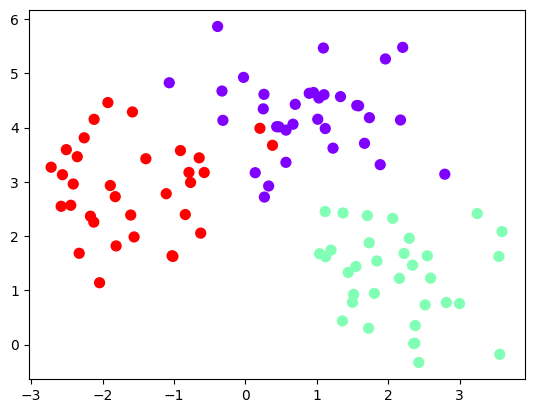

In [12]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

I wanted to generate blobs that almost intersect each other, but at the same time we can differentiate them at a glance. Now, all we would have to do is generate a random new point and assign it's label based on those k nearest neighbours. For that, remember that we will use the majority vote.

In [49]:
# Function to calculate distance from point to another points
def distance(p1, points):
    """Find the distance between points p1 and a whole dataset."""
    return np.sqrt(np.sum(np.power(p1 * np.ones_like(points) - points, 2),axis=1))
# Function to get the indices of the 5 nearest points
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    # Find the distance from p to every point
    distances = distance(p, points)
    # Find the k smallest distances
    ind = np.argsort(distances)[:k]
    return ind

In [34]:
# Generate 5 unlabeled points
# Seeting a fixed seed so that results are replicable by anyone at any time
np.random.seed(5)
X_new = np.random.rand(5, 2) * 6
# Create new datasets that hold these 5 new points as a 4th class
X2 = np.concatenate((X, X_new))
y2 = np.concatenate((y, np.array([4,4,4,4,4])))


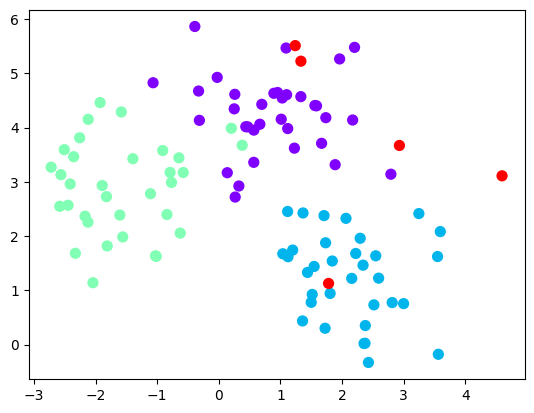

In [38]:
# Plot the new data
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='rainbow')

In [52]:
# Deciding the label for each of the new points
for i in range(5):
    ind = find_nearest_neighbors(X_new[i], X2)
    # Label is the majority
    y2[-5+i] = np.argmax(np.bincount(y2[ind]))

    

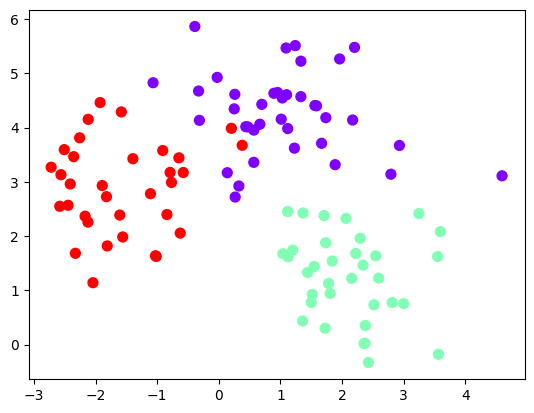

In [53]:
# Plot again
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='rainbow')

# That's it

We've generated our data, plotted it, generated some new points, calculated their distance relative to the rest of the data, and assigned them a label based on the majority vote of the closest k points. We now see that our new points have been assigned classes based on their closest neighbours.  

This is why this algorithm works so great, because it works easily. But it's often the case that it just can't decide well enough.